
# Übungsaufgaben 2


## Aufgabe 1 (Frequenzliste mit Python)
In der Vorlesung wurde die Frequenzliste mit der NLTK-Funktion `FreqDist()` berechnet. 

Berechnen Sie für folgende Tokenliste jeweils die Frequenzliste:

In [1]:
text = ['Call', 'me', 'Ishmael', '.', 'Call', 'me', 'Ahab', '.', 'Call', 'him', 'Ahab', '.']

#### (mit NLTK/FreqDist)

In [2]:
from nltk import FreqDist
fd = FreqDist(text)
fd

FreqDist({'.': 3, 'Ahab': 2, 'Call': 3, 'Ishmael': 1, 'him': 1, 'me': 2})

### 1a: mit Python

In [3]:
#dictionary comprehension:
def countwords_dict(text):
    counts = {t:0 for t in text}    
    for i in text: counts[i] += 1
    return counts

print(countwords_dict(text))

{'Call': 3, 'me': 2, 'Ishmael': 1, '.': 3, 'Ahab': 2, 'him': 1}


In [4]:
#defaultdict:
from collections import defaultdict

def countwords_defdict(text):
    counts = defaultdict(int)
    for t in text: counts[t] += 1
    return counts
        
print(countwords_defdict(text))

defaultdict(<class 'int'>, {'Call': 3, 'me': 2, 'Ishmael': 1, '.': 3, 'Ahab': 2, 'him': 1})


In [5]:
#try/except:
def countwords_try(text):
    counts = {} 
    for t in text: 
        try: counts[t] += 1 
        except: counts[t] = 1
    return counts

print(countwords_try(text))

{'Call': 3, 'me': 2, 'Ishmael': 1, '.': 3, 'Ahab': 2, 'him': 1}


In [6]:
#if/else:
def countwords_if(text):
    counts = {}
    for t in text:
        if t not in counts: counts[t] = 1
        else: counts[t] += 1
    return counts
        
print(countwords_if(text))

{'Call': 3, 'me': 2, 'Ishmael': 1, '.': 3, 'Ahab': 2, 'him': 1}


In [7]:
#set+count:
def countwords_set(text):
    word_set = set(text)
    counts = {}
    for t in word_set: counts[t] = text.count(t) 
    return counts

print(countwords_set(text))

{'him': 1, 'me': 2, '.': 3, 'Ahab': 2, 'Ishmael': 1, 'Call': 3}


##### 1d: Efficiency Tests

In [8]:
from nltk.tokenize import word_tokenize
raw_wahlverw = open('wahlverwandschaften.txt').read().lower()
wahlverw = word_tokenize(raw_wahlverw)
wahlverw[0:9]

['die',
 'wahlverwandtschaften',
 'ein',
 'roman',
 'von',
 'johann',
 'wolfgang',
 'von',
 'goethe']

In [9]:
import timeit, functools

In [10]:
t = timeit.Timer(functools.partial(FreqDist, wahlverw)) #NLTK.FreqDist()
print(t.timeit(5)) #number of executions

0.007468117051757872


In [11]:
t = timeit.Timer(functools.partial(countwords_dict, wahlverw))
print(t.timeit(5))

0.01400143199134618


In [12]:
t = timeit.Timer(functools.partial(countwords_defdict, wahlverw))
print(t.timeit(5))

0.012836566078476608


In [13]:
t = timeit.Timer(functools.partial(countwords_try, wahlverw))
print(t.timeit(5))

0.014851063024252653


In [14]:
t = timeit.Timer(functools.partial(countwords_if, wahlverw))
print(t.timeit(5))

0.01236682990565896


In [15]:
t = timeit.Timer(functools.partial(countwords_set, wahlverw))
print(t.timeit(5)) #count() inefficient..

2.8465699050575495


### 1b: mit Counter (Collection)

https://docs.python.org/3/library/collections.html

In [16]:
# Counter (Collection):
from collections import Counter

def countwords_counter(text):
    counts = Counter(text)
    return counts

print(countwords_counter(text))

Counter({'Call': 3, '.': 3, 'me': 2, 'Ahab': 2, 'Ishmael': 1, 'him': 1})


In [17]:
countwords_counter(text).most_common(3)

[('Call', 3), ('.', 3), ('me', 2)]

In [18]:
t = timeit.Timer(functools.partial(countwords_counter, wahlverw))
print(t.timeit(5)) #Counter most efficient

0.006068342016078532


## Aufgabe 2 (Tokenisierung mit Python und NLTK)

Führen Sie auf `wahlverwandschaften.txt` verschiedene Varianten einer Tokenisierung durch. Verwenden Sie: 


- `split()`
- `re.findall()`
- `nltk.word_tokenize()`
- `nltk.regexp_tokenize()` (siehe https://www.nltk.org/book/ch03.html)


siehe auch https://www.nltk.org/book/ch03.html#sec-tokenization

### split():

In [19]:
import string
punc = string.punctuation
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
text = open('wahlverwandschaften.txt').read().lower()

In [21]:
words = ''.join([t for t in text if not t in punc]).split()
print(words[0:50])

['die', 'wahlverwandtschaften', 'ein', 'roman', 'von', 'johann', 'wolfgang', 'von', 'goethe', 'erster', 'teil', 'erstes', 'kapitel', 'eduard—so', 'nennen', 'wir', 'einen', 'reichen', 'baron', 'im', 'besten', 'mannesalter—eduard', 'hatte', 'in', 'seiner', 'baumschule', 'die', 'schönste', 'stunde', 'eines', 'aprilnachmittags', 'zugebracht', 'um', 'frisch', 'erhaltene', 'pfropfreiser', 'auf', 'junge', 'stämme', 'zu', 'bringen', 'sein', 'geschäft', 'war', 'eben', 'vollendet', 'er', 'legte', 'die', 'gerätschaften']


In [22]:
Counter(words).most_common(5)

[('und', 331), ('die', 256), ('zu', 184), ('der', 183), ('sie', 163)]

In [23]:
#mit Trennung Gedankenstriche (ohne RegExp):
text = text.replace("—", " ")
words = ''.join([t for t in text if not t in punc]).split()
print(words[0:50])

['die', 'wahlverwandtschaften', 'ein', 'roman', 'von', 'johann', 'wolfgang', 'von', 'goethe', 'erster', 'teil', 'erstes', 'kapitel', 'eduard', 'so', 'nennen', 'wir', 'einen', 'reichen', 'baron', 'im', 'besten', 'mannesalter', 'eduard', 'hatte', 'in', 'seiner', 'baumschule', 'die', 'schönste', 'stunde', 'eines', 'aprilnachmittags', 'zugebracht', 'um', 'frisch', 'erhaltene', 'pfropfreiser', 'auf', 'junge', 'stämme', 'zu', 'bringen', 'sein', 'geschäft', 'war', 'eben', 'vollendet', 'er', 'legte']


In [24]:
Counter(words).most_common(5)

[('und', 334), ('die', 256), ('zu', 184), ('der', 183), ('sie', 163)]

In [25]:
#mit Punctuation (einfache Lösung, die z.B. Abkürzungen wie 'Mr.' nicht korrekt behandelt):
words = ''.join([' '+t if t in punc else t for t in text]).split()
print(words[0:50])

['die', 'wahlverwandtschaften', 'ein', 'roman', 'von', 'johann', 'wolfgang', 'von', 'goethe', 'erster', 'teil', 'erstes', 'kapitel', 'eduard', 'so', 'nennen', 'wir', 'einen', 'reichen', 'baron', 'im', 'besten', 'mannesalter', 'eduard', 'hatte', 'in', 'seiner', 'baumschule', 'die', 'schönste', 'stunde', 'eines', 'aprilnachmittags', 'zugebracht', ',', 'um', 'frisch', 'erhaltene', 'pfropfreiser', 'auf', 'junge', 'stämme', 'zu', 'bringen', '.', 'sein', 'geschäft', 'war', 'eben', 'vollendet']


In [26]:
Counter(words).most_common(5)

[(',', 1229), ('.', 430), ('und', 334), ('die', 256), ('zu', 184)]

### re.findall():

In [27]:
import re

In [28]:
text = open('wahlverwandschaften.txt').read().lower()

In [29]:
words = re.findall(r'[\w]+', text)
print(words[0:50])

['die', 'wahlverwandtschaften', 'ein', 'roman', 'von', 'johann', 'wolfgang', 'von', 'goethe', 'erster', 'teil', 'erstes', 'kapitel', 'eduard', 'so', 'nennen', 'wir', 'einen', 'reichen', 'baron', 'im', 'besten', 'mannesalter', 'eduard', 'hatte', 'in', 'seiner', 'baumschule', 'die', 'schönste', 'stunde', 'eines', 'aprilnachmittags', 'zugebracht', 'um', 'frisch', 'erhaltene', 'pfropfreiser', 'auf', 'junge', 'stämme', 'zu', 'bringen', 'sein', 'geschäft', 'war', 'eben', 'vollendet', 'er', 'legte']


In [30]:
Counter(words).most_common(5)

[('und', 345), ('die', 258), ('der', 187), ('zu', 184), ('sie', 166)]

In [31]:
#mit Bindestrich-Wörtern (falls gegeben):
words = re.findall(r'[\w\—\-]+', text)
print(words[0:50])

['die', 'wahlverwandtschaften', 'ein', 'roman', 'von', 'johann', 'wolfgang', 'von', 'goethe', 'erster', 'teil', 'erstes', 'kapitel', 'eduard—so', 'nennen', 'wir', 'einen', 'reichen', 'baron', 'im', 'besten', 'mannesalter—eduard', 'hatte', 'in', 'seiner', 'baumschule', 'die', 'schönste', 'stunde', 'eines', 'aprilnachmittags', 'zugebracht', 'um', 'frisch', 'erhaltene', 'pfropfreiser', 'auf', 'junge', 'stämme', 'zu', 'bringen', 'sein', 'geschäft', 'war', 'eben', 'vollendet', 'er', 'legte', 'die', 'gerätschaften']


In [32]:
Counter(words).most_common(5)

[('und', 342), ('die', 258), ('der', 187), ('zu', 184), ('sie', 166)]

In [33]:
#mit Punctuation:
words = re.findall(r'\w+|[^\w\s]+', text) 
print(words[0:50])
#entspricht wordpunct_tokenize als einfachem NLTK-RegExp-Parser: https://www.nltk.org/api/nltk.tokenize.html

['die', 'wahlverwandtschaften', 'ein', 'roman', 'von', 'johann', 'wolfgang', 'von', 'goethe', 'erster', 'teil', 'erstes', 'kapitel', 'eduard', '—', 'so', 'nennen', 'wir', 'einen', 'reichen', 'baron', 'im', 'besten', 'mannesalter', '—', 'eduard', 'hatte', 'in', 'seiner', 'baumschule', 'die', 'schönste', 'stunde', 'eines', 'aprilnachmittags', 'zugebracht', ',', 'um', 'frisch', 'erhaltene', 'pfropfreiser', 'auf', 'junge', 'stämme', 'zu', 'bringen', '.', 'sein', 'geschäft', 'war']


In [34]:
Counter(words).most_common(5)

[(',', 1140), ('und', 345), ('.', 340), ('die', 258), ('„', 212)]

### nltk.wordpunct_tokenize():

In [35]:
from nltk.tokenize import wordpunct_tokenize

In [36]:
text = open('wahlverwandschaften.txt').read().lower()

In [37]:
#verwendet TreebankWordTokenizer: https://www.nltk.org/api/nltk.tokenize.treebank.html#nltk.tokenize.treebank.TreebankWordTokenizer
words = wordpunct_tokenize(text)
print(words[0:50])

['die', 'wahlverwandtschaften', 'ein', 'roman', 'von', 'johann', 'wolfgang', 'von', 'goethe', 'erster', 'teil', 'erstes', 'kapitel', 'eduard', '—', 'so', 'nennen', 'wir', 'einen', 'reichen', 'baron', 'im', 'besten', 'mannesalter', '—', 'eduard', 'hatte', 'in', 'seiner', 'baumschule', 'die', 'schönste', 'stunde', 'eines', 'aprilnachmittags', 'zugebracht', ',', 'um', 'frisch', 'erhaltene', 'pfropfreiser', 'auf', 'junge', 'stämme', 'zu', 'bringen', '.', 'sein', 'geschäft', 'war']


In [38]:
Counter(words).most_common(5)

[(',', 1140), ('und', 345), ('.', 340), ('die', 258), ('„', 212)]

In [60]:
# erkennt keine Abkürzungen etc.:
s = '''Mr. Smith: Good muffins cost $3.88\nin New York.  Please buy me\ntwo of them.\nThanks.'''
words = wordpunct_tokenize(s)
print(words[0:50])

['Mr', '.', 'Smith', ':', 'Good', 'muffins', 'cost', '$', '3', '.', '88', 'in', 'New', 'York', '.', 'Please', 'buy', 'me', 'two', 'of', 'them', '.', 'Thanks', '.']


### nltk.word_tokenize():

- https://www.nltk.org/api/nltk.tokenize.html
- https://www.nltk.org/api/nltk.tokenize.treebank.html#nltk.tokenize.treebank.TreebankWordTokenizer

In [39]:
from nltk.tokenize import word_tokenize

In [40]:
text = open('wahlverwandschaften.txt').read().lower()

In [41]:
#verwendet TreebankWordTokenizer: https://www.nltk.org/api/nltk.tokenize.treebank.html#nltk.tokenize.treebank.TreebankWordTokenizer
words = word_tokenize(text)
print(words[0:50])

['die', 'wahlverwandtschaften', 'ein', 'roman', 'von', 'johann', 'wolfgang', 'von', 'goethe', 'erster', 'teil', 'erstes', 'kapitel', 'eduard—so', 'nennen', 'wir', 'einen', 'reichen', 'baron', 'im', 'besten', 'mannesalter—eduard', 'hatte', 'in', 'seiner', 'baumschule', 'die', 'schönste', 'stunde', 'eines', 'aprilnachmittags', 'zugebracht', ',', 'um', 'frisch', 'erhaltene', 'pfropfreiser', 'auf', 'junge', 'stämme', 'zu', 'bringen', '.', 'sein', 'geschäft', 'war', 'eben', 'vollendet', ';', 'er']


In [42]:
Counter(words).most_common(5)

[(',', 1229), ('.', 427), ('und', 331), ('die', 256), ('zu', 184)]

In [61]:
# erkennt Abkürzungen etc.:
s = '''Mr. Smith: Good muffins cost $3.88\nin New York.  Please buy me\ntwo of them.\nThanks.'''
words = word_tokenize(s)
print(words[0:50])

['Mr.', 'Smith', ':', 'Good', 'muffins', 'cost', '$', '3.88', 'in', 'New', 'York', '.', 'Please', 'buy', 'me', 'two', 'of', 'them', '.', 'Thanks', '.']


### nltk.regexp_tokenize():

#### Definition eigener RegExp-Tokenizer

In [43]:
from nltk import regexp_tokenize

In [44]:
# Beispiel: https://www.nltk.org/book/ch03.html
text = 'That U.S.A. poster-print costs $12.40...'

In [45]:
pattern = r'''(?x)     # set flag to allow verbose regexps
(?:[A-Z]\.)+       # abbreviations, e.g. U.S.A.
| \w+(?:-\w+)*       # words with optional internal hyphens
| \$?\d+(?:\.\d+)?%? # currency and percentages, e.g. $12.40, 82%
| \.\.\.             # ellipsis
| [][.,;"'?():-_`]   # these are separate tokens; includes ], [
'''
regexp_tokenize(text, pattern)

['That', 'U.S.A.', 'poster-print', 'costs', '$12.40', '...']

## Aufgabe 3 (gefilterte Frequenzliste mit NLTK)

Berechnen Sie mit NLTK eine Stopwort-gefilterte Frequenzliste auf dem Brown-Korpus und plotten diese.

In [46]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop[0:9]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you']

In [47]:
from nltk.corpus import brown
from nltk import FreqDist
import re

In [48]:
content_words = [word.lower() for word in brown.words() if (word.lower() not in stop and not re.match(r"[^\w]", word))]
fd = FreqDist(content_words)

In [49]:
fd.most_common(10)

[('one', 3292),
 ('would', 2714),
 ('said', 1961),
 ('new', 1635),
 ('could', 1601),
 ('time', 1598),
 ('two', 1412),
 ('may', 1402),
 ('first', 1361),
 ('like', 1292)]

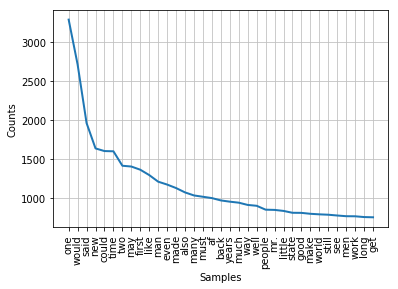

In [50]:
fd.plot(35, cumulative=False)

### Aufgabe 4 (Konkordanzen mit Python)

Berechnen Sie `wahlverwandschaften.txt` eine zeilenweise Konkordanz mit Python für den Suchterm 'geht'.

In [51]:
import re
matches = re.findall(r"(^.*\bgeht\b.*$)", open('wahlverwandschaften.txt').read().lower(), re.MULTILINE)
matches

['innere, du das äußere und was ins ganze geht. meine einrichtung ist',
 'ottilien geht, wie dir mit dem hauptmann. höchst ungern weiß ich das',
 'wollte. da es aber einmal nicht in unsern plan geht und man an seinen',
 'abends der hauptmann; „nun geht uns aber das notwendigste noch ab, ein']

### Aufgabe 5 (Bigramme mit Python und NLTK)

### 5a: Berechnen Sie auf `wahlverwandschaften.txt` eine Bigramm-Liste mit Python.

In [52]:
#Tokenisierung
words = re.findall(r'\w+', open('wahlverwandschaften.txt').read().lower())
print(words[0:30])

['die', 'wahlverwandtschaften', 'ein', 'roman', 'von', 'johann', 'wolfgang', 'von', 'goethe', 'erster', 'teil', 'erstes', 'kapitel', 'eduard', 'so', 'nennen', 'wir', 'einen', 'reichen', 'baron', 'im', 'besten', 'mannesalter', 'eduard', 'hatte', 'in', 'seiner', 'baumschule', 'die', 'schönste']


In [53]:
#zip takes iterables and aggregates them in a tuple:
example = ['ein', 'roman', 'von', 'johann', 'wolfgang', 'von', 'goethe']
result = zip(example, example)
print(list(result))

[('ein', 'ein'), ('roman', 'roman'), ('von', 'von'), ('johann', 'johann'), ('wolfgang', 'wolfgang'), ('von', 'von'), ('goethe', 'goethe')]


In [54]:
paste = zip(words[:-1], words[1:])
print(list(paste)[0:9])

[('die', 'wahlverwandtschaften'), ('wahlverwandtschaften', 'ein'), ('ein', 'roman'), ('roman', 'von'), ('von', 'johann'), ('johann', 'wolfgang'), ('wolfgang', 'von'), ('von', 'goethe'), ('goethe', 'erster')]


### 5b: Testen Sie verschiedene NLTK-Bigramm-Assoziationsmaße und Frequency-Filter für einen Text ihrer Wahl.

In [63]:
import nltk
from nltk.book import *

In [65]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(text6)

In [66]:
finder.apply_freq_filter(20)
finder.nbest(bigram_measures.pmi, 10)

[('mumble', 'mumble'),
 ('clop', 'clop'),
 ('Burn', 'her'),
 ('BLACK', 'KNIGHT'),
 ('FRENCH', 'GUARD'),
 ('A', 'witch'),
 ('ha', 'ha'),
 ('HEAD', 'KNIGHT'),
 ('SOLDIER', '#'),
 ('VILLAGER', '#')]

In [67]:
finder.apply_freq_filter(20)
finder.nbest(bigram_measures.raw_freq, 10)

[('ARTHUR', ':'),
 ("'", 's'),
 (']', '['),
 ('!', '['),
 (':', 'Oh'),
 ('Oh', ','),
 ("'", 't'),
 ('LAUNCELOT', ':'),
 ('#', '1'),
 ('.', 'ARTHUR')]